# Multi-Spectral Band Visualization

## Preparing data

Load the **Scenes** from Folder

In [4]:
import os
import numpy as np

# Path to your uploaded folder in Colab
data_dir = '/content/Sentinel-2_coasatal_scenes'

# Load each .npy file (scene) into a list
scenes = []
for filename in sorted(os.listdir(data_dir)):
    if filename.endswith('.npy'):
        path = os.path.join(data_dir, filename)
        scene = np.load(path, allow_pickle=True)  # shape: (12, H, W)
        scenes.append(scene)

# Let's use the first scene for our work
scene = scenes[0]
print(scene.shape)  # should be (12, height, width)


(12, 120, 120)


## RGB Visualization

Extract Bands for **RGB** Composite

In [10]:
# Band index mapping (Sentinel-2, upscaled to 10m):

# B02 - Blue  (index 1)
# B03 - Green (index 2)
# B04 - Red   (index 3)

blue  = scene[1]
green = scene[2]
red   = scene[3]

print("Blue shape:", blue.shape)


Blue shape: (120, 120)


**Normalize Bands**

In [11]:
def normalize(band):
    return (band - band.min()) / (band.max() - band.min())

red_n   = normalize(red)
green_n = normalize(green)
blue_n  = normalize(blue)


Stack & Display **RGB** **Image**


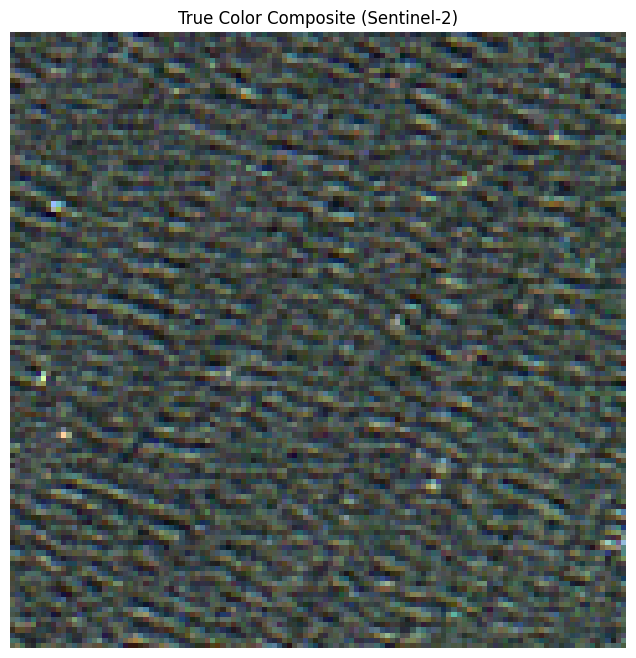

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Stack bands along last dimension to form RGB image
rgb = np.dstack((red_n, green_n, blue_n))

plt.figure(figsize=(8,8))
plt.imshow(rgb)
plt.title('True Color Composite (Sentinel-2)')
plt.axis('off')
plt.show()


## NDVI Visualization

### Plot NDVI

###NDVI = (NIR - Red) / (NIR + Red)

In [13]:
# B08 - Near Infrared (NIR) = index 7
nir = scene[7]

# Convert to float and avoid division by zero
ndvi = (nir - red) / (nir + red + 1e-10)


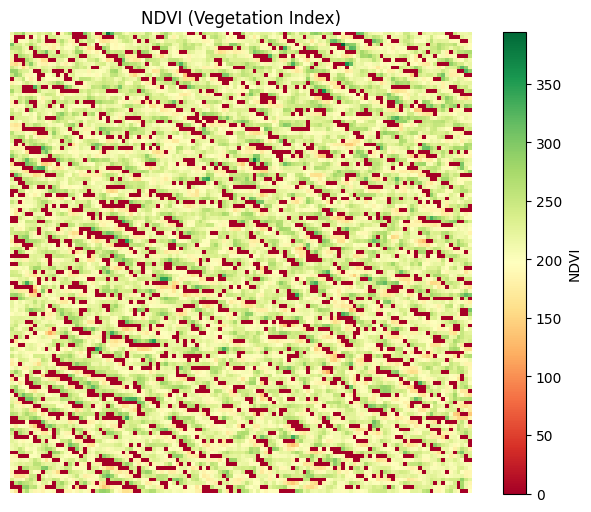

In [14]:
plt.figure(figsize=(8, 6))
plt.imshow(ndvi, cmap='RdYlGn')
plt.colorbar(label='NDVI')
plt.title('NDVI (Vegetation Index)')
plt.axis('off')
plt.show()




*   Green = healthy vegetation
*   Yellow/red = sparse or dead vegetation
*   Near 0 = water, clouds, etc.



In [15]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Save both the **RGB** composite and the **NDVI** image

Save the RGB Composite

In [16]:
# Save RGB as PNG
rgb_path = '/content/scene1_rgb.png'

# RGB already stacked and normalized as 'rgb'
mpimg.imsave(rgb_path, rgb)

print("✅ RGB image saved at:", rgb_path)


✅ RGB image saved at: /content/scene1_rgb.png


Save the NDVI Image

In [17]:
ndvi_path = '/content/scene1_ndvi.png'

plt.imsave(ndvi_path, ndvi, cmap='RdYlGn')
print("✅ NDVI image saved at:", ndvi_path)


✅ NDVI image saved at: /content/scene1_ndvi.png


## Creating a loop for **RGB** and **NDVI** Visualization for rest of the scenes

 **RGB** Visualisation of Scene 2->5

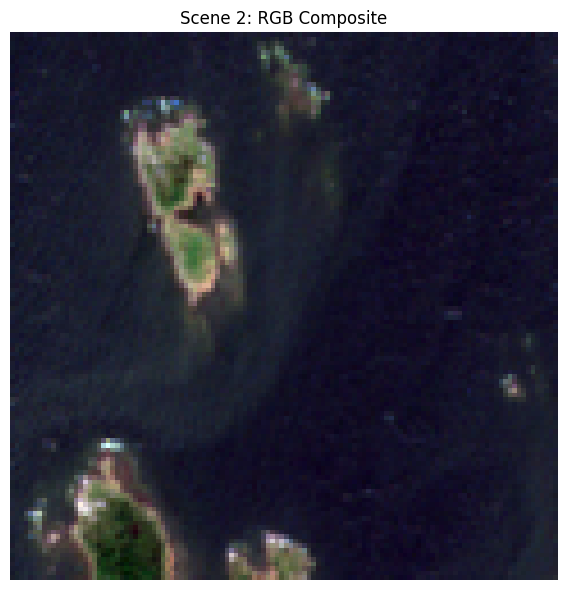

RGB saved for scene 2 at /content/scene5_rgb.png


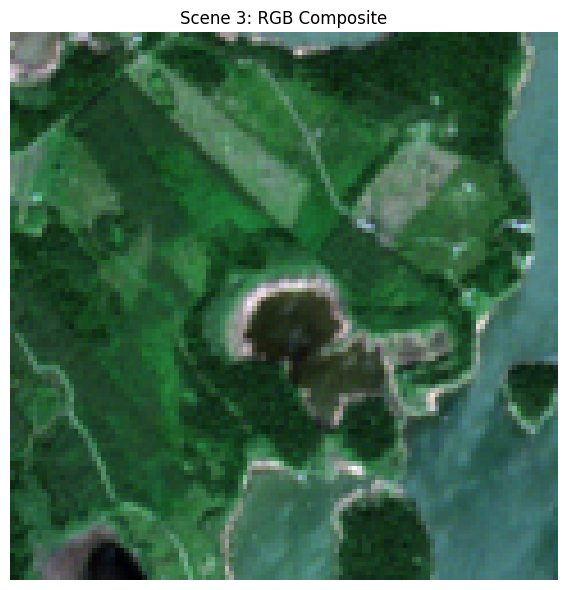

RGB saved for scene 3 at /content/scene5_rgb.png


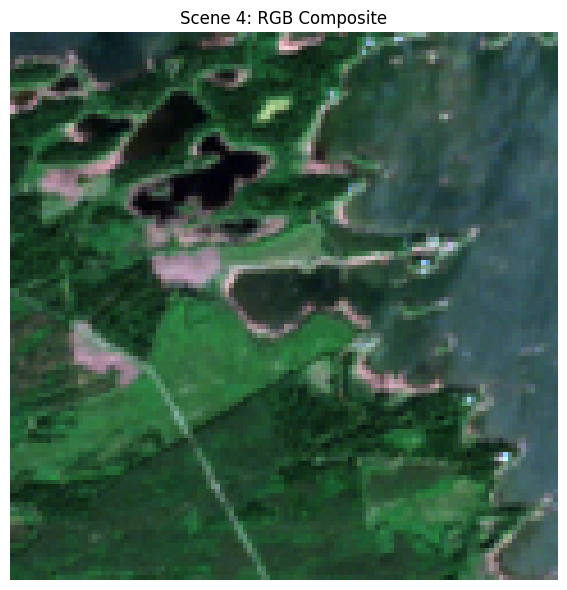

RGB saved for scene 4 at /content/scene5_rgb.png


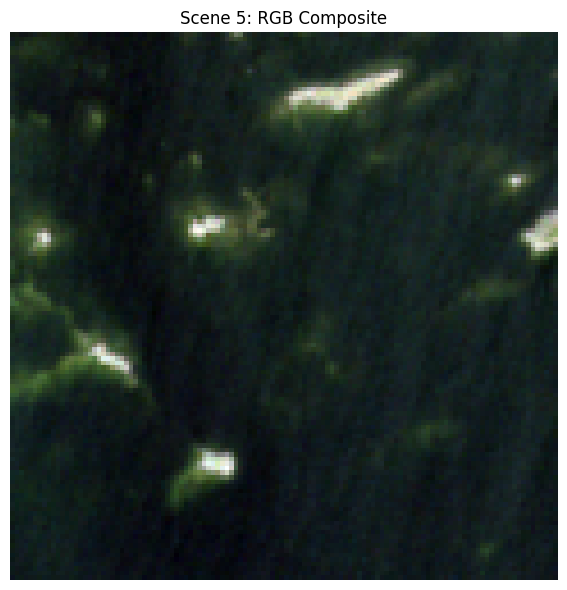

RGB saved for scene 5 at /content/scene5_rgb.png


In [42]:
import os
import matplotlib.pyplot as plt
import numpy as np

# Reuse the normalization function
def normalize(band):
    return (band - band.min()) / (band.max() - band.min())

# Folder where your scene files are located
folder_path = '/content/Sentinel-2_coasatal_scenes'
scene_files = sorted(os.listdir(folder_path))

# Process scene 2 onwards
for i, scene_file in enumerate(scene_files[1:], start=2):  # Skipping scene 1
    scene_path = os.path.join(folder_path, scene_file)
    scene = np.load(scene_path)

    # Extract RGB bands
    blue  = scene[1]
    green = scene[2]
    red   = scene[3]

    # Normalize
    blue_n  = normalize(blue)
    green_n = normalize(green)
    red_n   = normalize(red)

    # Stack and visualize
    rgb = np.dstack((red_n, green_n, blue_n))

    plt.figure(figsize=(6, 6))
    plt.imshow(rgb)
    plt.title(f'Scene {i}: RGB Composite')
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    # Save RGB image
    rgb_output_path = f"/content/scene{i}_rgb.png"
    plt.savefig(rgb_output_path, bbox_inches='tight', pad_inches=0.1)
    plt.show()

    print(f"RGB saved for scene {i} at {rgb_output_path}")


 **NDVI** Visualisation of Scene 2->5

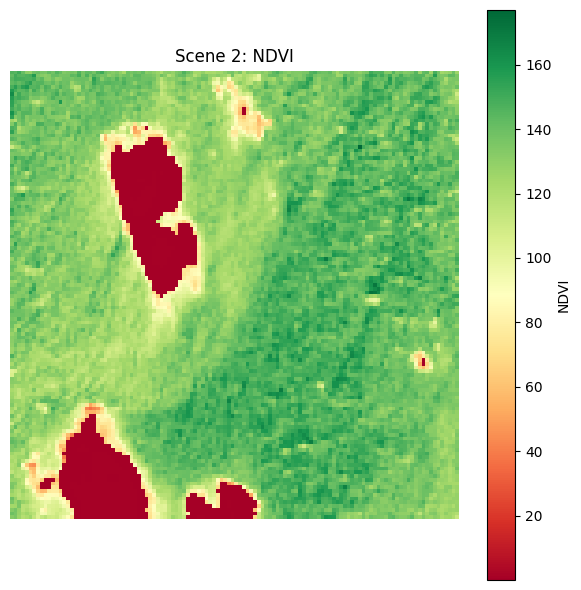

NDVI saved for scene 2 at /content/scene5_ndvi.png


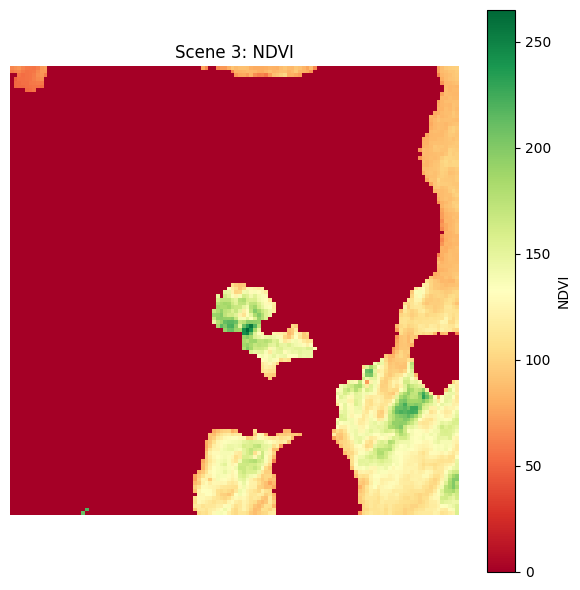

NDVI saved for scene 3 at /content/scene5_ndvi.png


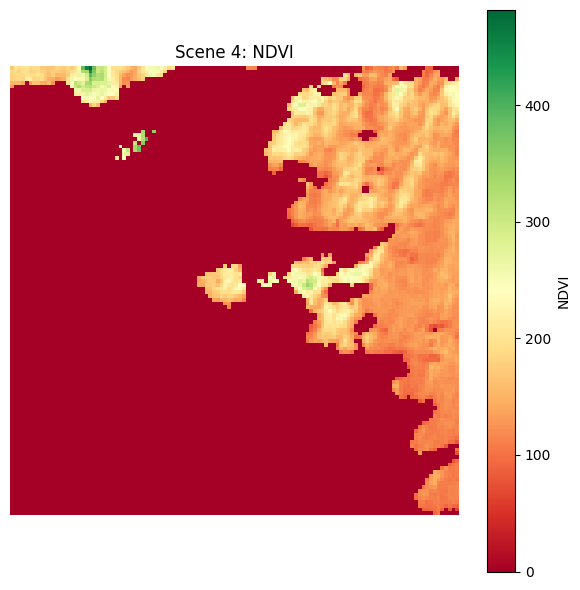

NDVI saved for scene 4 at /content/scene5_ndvi.png


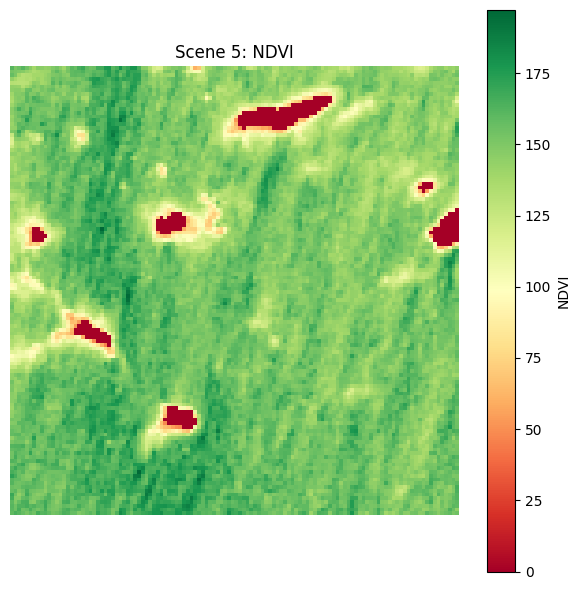

NDVI saved for scene 5 at /content/scene5_ndvi.png


In [44]:
for i, scene_file in enumerate(scene_files[1:], start=2):  # Skipping scene 1
    scene_path = os.path.join(folder_path, scene_file)
    scene = np.load(scene_path)

    red = scene[3]
    nir = scene[7]

    # NDVI calculation
    ndvi = (nir - red) / (nir + red + 1e-10)  # Small constant to avoid div-by-zero

    plt.figure(figsize=(6, 6))
    plt.imshow(ndvi, cmap='RdYlGn')
    plt.colorbar(label='NDVI')
    plt.title(f'Scene {i}: NDVI')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

    # Save NDVI image
    ndvi_output_path = f"/content/scene{i}_ndvi.png"
    plt.savefig(ndvi_output_path, bbox_inches='tight', pad_inches=0.1)
    plt.close()

    print(f"NDVI saved for scene {i} at {ndvi_output_path}")


## Compare **NDVI** and **RGB** Side-by-Side

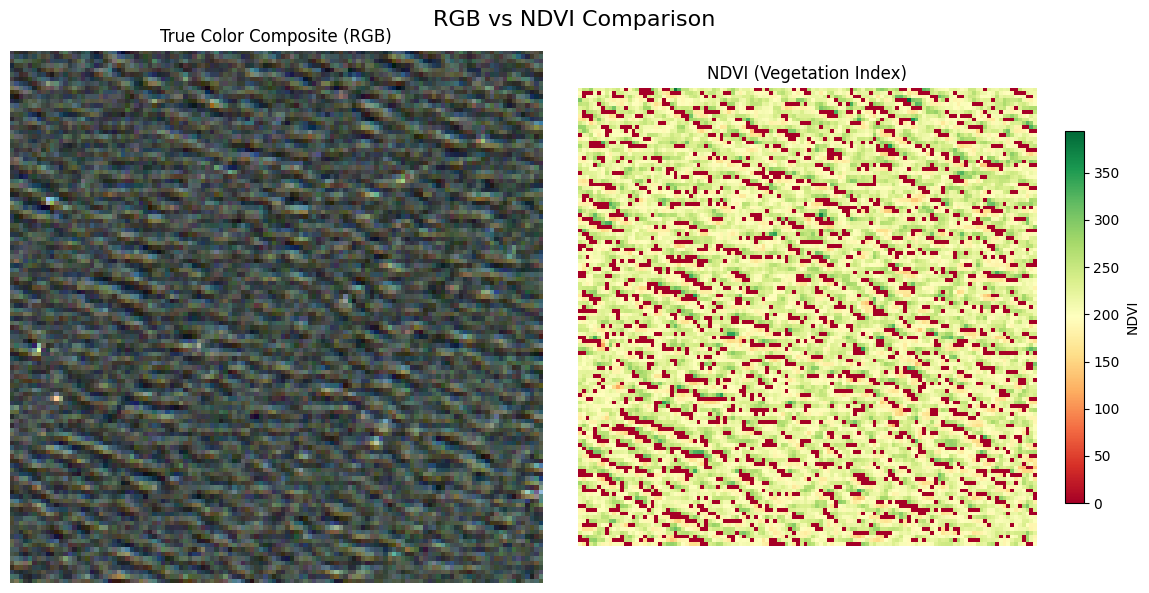

In [18]:
import matplotlib.pyplot as plt

# Side-by-side display
plt.figure(figsize=(12, 6))

# RGB Image
plt.subplot(1, 2, 1)
plt.imshow(rgb)
plt.title('True Color Composite (RGB)')
plt.axis('off')

# NDVI Image
plt.subplot(1, 2, 2)
plt.imshow(ndvi, cmap='RdYlGn')
plt.title('NDVI (Vegetation Index)')
plt.colorbar(shrink=0.7, label='NDVI')
plt.axis('off')

plt.suptitle('RGB vs NDVI Comparison', fontsize=16)
plt.tight_layout()
plt.show()


### Loop Through All 5 Scenes

In [19]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def normalize(band):
    return (band - band.min()) / (band.max() - band.min())

def process_scene(scene, index):
    # Extract relevant bands
    blue = scene[1]
    green = scene[2]
    red = scene[3]
    nir = scene[7]

    # Normalize RGB bands
    red_n = normalize(red)
    green_n = normalize(green)
    blue_n = normalize(blue)
    rgb = np.dstack((red_n, green_n, blue_n))

    # Compute NDVI
    ndvi = (nir - red) / (nir + red + 1e-10)

    # Plot and Save Side-by-Side
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(rgb)
    plt.title('Scene {} - RGB'.format(index+1))
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(ndvi, cmap='RdYlGn')
    plt.title('Scene {} - NDVI'.format(index+1))
    plt.colorbar(shrink=0.7, label='NDVI')
    plt.axis('off')

    plt.suptitle('Scene {} - RGB vs NDVI'.format(index+1), fontsize=14)
    plt.tight_layout()

    # Save the image
    save_path = f'/content/comparison_scene_{index+1}.png'
    plt.savefig(save_path)
    plt.close()

    print(f"✅ Saved: comparison_scene_{index+1}.png")

# Loop through all scenes
for i, scene in enumerate(scenes):
    process_scene(scene, i)


✅ Saved: comparison_scene_1.png
✅ Saved: comparison_scene_2.png
✅ Saved: comparison_scene_3.png
✅ Saved: comparison_scene_4.png
✅ Saved: comparison_scene_5.png


# Cloud Detection

Why Clouds Matter in Satellite Data


*   Clouds obscure surface features.


*   They typically appear bright in visible/NIR bands and dark in SWIR

*   We need to either detect and mask them or avoid analyzing cloud-covered areas.

Cloud Mask

In [20]:
scene1 = scenes[0]

blue = normalize(scene1[1])
green = normalize(scene1[2])
red = normalize(scene1[3])
nir = normalize(scene1[7])
swir1 = normalize(scene1[11])


In [21]:
# Very simple rule: clouds are bright in visible/NIR, not SWIR
cloud_mask = (
    (scene[1] > 0.25) &   # Blue
    (scene[2] > 0.25) &   # Green
    (scene[3] > 0.25) &   # Red
    (scene[7] > 0.25) &   # NIR
    (scene[11] < 0.3)     # SWIR1
)


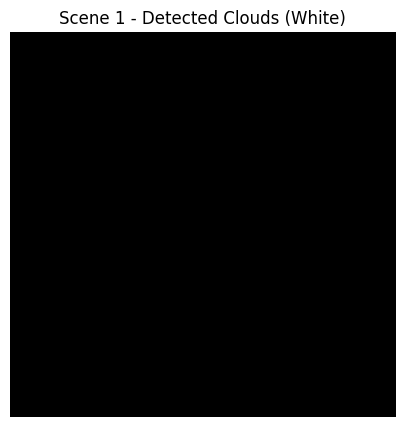

In [22]:
plt.figure(figsize=(10, 5))

plt.imshow(cloud_mask, cmap='gray')
plt.title('Scene 1 - Detected Clouds (White)')
plt.axis('off')
plt.show()


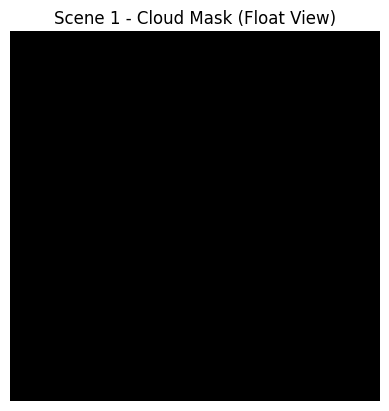

In [23]:
# Convert to float for better visualization
cloud_mask_float = cloud_mask.astype(float)

# Then save or show
plt.imshow(cloud_mask_float, cmap='gray')
plt.title('Scene 1 - Cloud Mask (Float View)')
plt.axis('off')
plt.show()


Check the presence of cloud in scene 1

In [24]:
print("Cloud pixels:", np.sum(cloud_mask))
print("Total pixels:", cloud_mask.size)


Cloud pixels: 0
Total pixels: 14400


In [25]:
plt.imsave('/content/scene1_cloud_mask.png', cloud_mask_float, cmap='gray')


Now check done for first its working looping for the rest

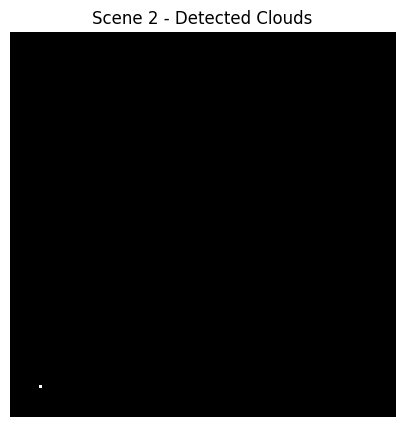

✅ Cloud mask saved for Scene 2


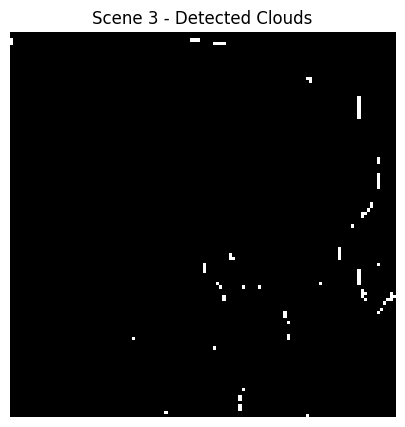

✅ Cloud mask saved for Scene 3


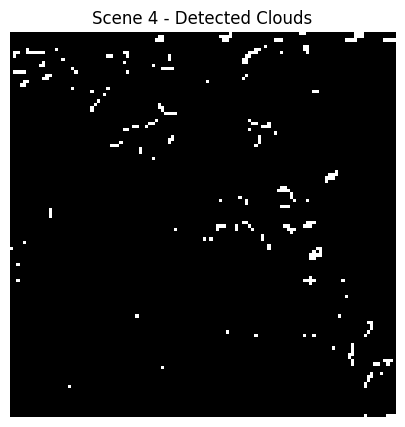

✅ Cloud mask saved for Scene 4


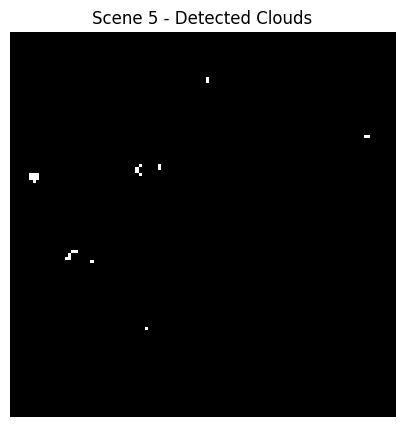

✅ Cloud mask saved for Scene 5


In [26]:
for i in range(1, len(scenes)):  # Start from scene 2 (index 1)
    scene = scenes[i]

    # Normalize required bands
    blue = normalize(scene[1])
    green = normalize(scene[2])
    red = normalize(scene[3])
    nir = normalize(scene[7])
    swir1 = normalize(scene[11])

    # Generate cloud mask
    cloud_mask = (
        (blue > 0.25) &
        (green > 0.25) &
        (red > 0.25) &
        (nir > 0.25) &
        (swir1 < 0.3)
    )

    cloud_mask_float = cloud_mask.astype(float)

    # Visualize
    plt.figure(figsize=(10, 5))
    plt.imshow(cloud_mask_float, cmap='gray')
    plt.title(f'Scene {i+1} - Detected Clouds')
    plt.axis('off')
    plt.show()

    # Save the mask
    save_path = f'/content/scene{i+1}_cloud_mask.png'
    plt.imsave(save_path, cloud_mask_float, cmap='gray')
    print(f"✅ Cloud mask saved for Scene {i+1}")


###Masking Clouds from RGB

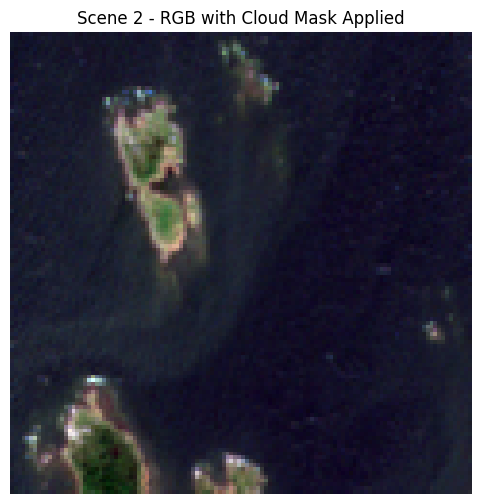

In [27]:
scene = scenes[1]  # Example for Scene 2

# Extract and normalize RGB bands
red = normalize(scene[3])
green = normalize(scene[2])
blue = normalize(scene[1])
rgb = np.dstack((red, green, blue))

# Create cloud mask
nir = normalize(scene[7])
swir1 = normalize(scene[11])
cloud_mask = (
    (blue > 0.25) &
    (green > 0.25) &
    (red > 0.25) &
    (nir > 0.25) &
    (swir1 < 0.3)
)

# Mask the RGB: set cloud pixels to gray (e.g., [0.5, 0.5, 0.5])
masked_rgb = rgb.copy()
masked_rgb[cloud_mask] = [0.5, 0.5, 0.5]  # or [0, 0, 0] for black

# Show result
plt.figure(figsize=(8, 6))
plt.imshow(masked_rgb)
plt.title('Scene 2 - RGB with Cloud Mask Applied')
plt.axis('off')
plt.show()


In [32]:
plt.imsave('/content/scene1_rgb_masked.png', masked_rgb)
print("✅ Scene 1 masked RGB saved")

✅ Scene 1 masked RGB saved


### Masking Clouds from NDVI

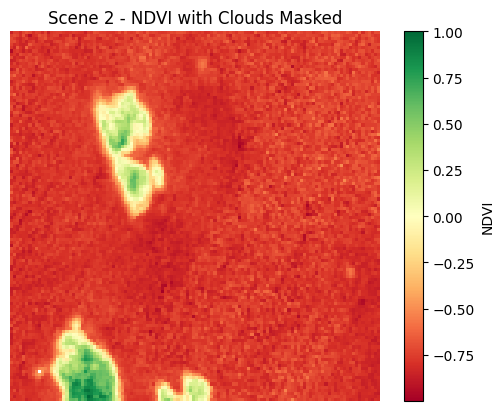

In [28]:
ndvi = (nir - red) / (nir + red + 1e-10)
ndvi_masked = ndvi.copy()
ndvi_masked[cloud_mask] = np.nan  # Set cloud areas to NaN

# Show result
plt.imshow(ndvi_masked, cmap='RdYlGn')
plt.title("Scene 2 - NDVI with Clouds Masked")
plt.colorbar(label="NDVI")
plt.axis('off')
plt.show()


In [33]:
plt.imsave('/content/scene1_ndvi_masked.png', ndvi_masked, cmap='RdYlGn', vmin=-1, vmax=1)
print("✅ Scene 1 masked NDVI saved")

✅ Scene 1 masked NDVI saved


now if we don't wanna remove clouds so we can just higlight them by making them semi transparent

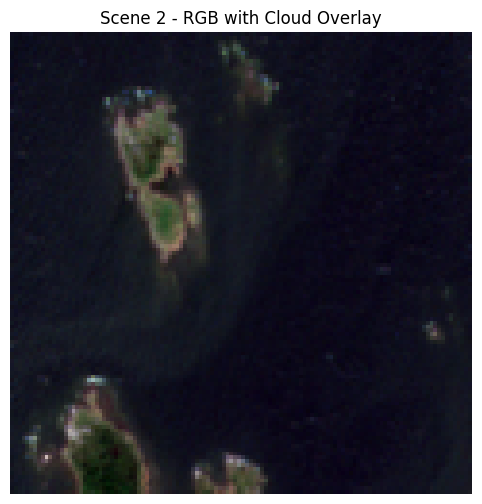

In [29]:
plt.figure(figsize=(8, 6))
plt.imshow(rgb)
plt.imshow(cloud_mask, cmap='gray', alpha=0.3)  # overlay mask
plt.title("Scene 2 - RGB with Cloud Overlay")
plt.axis('off')
plt.show()



Mask Clouds from **RGB** (Scenes 2 to 5)


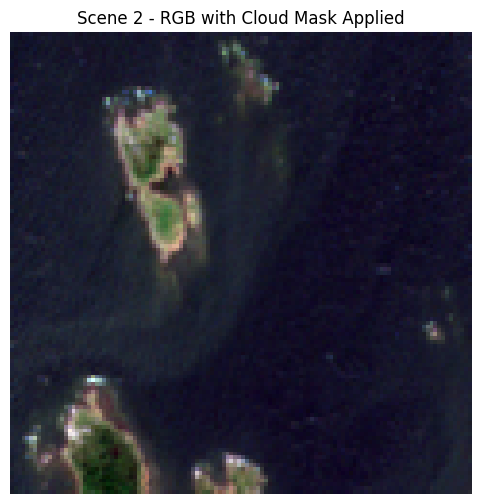

✅ Scene 2 masked RGB saved


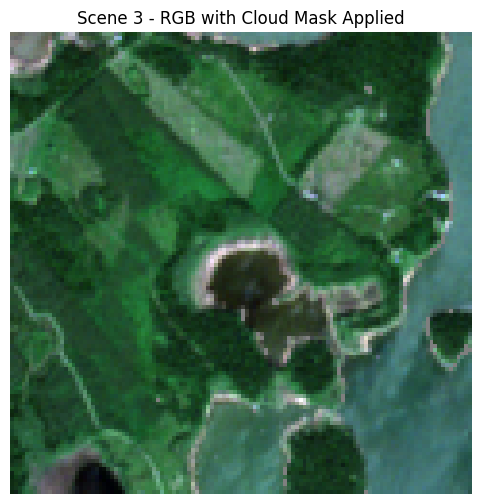

✅ Scene 3 masked RGB saved


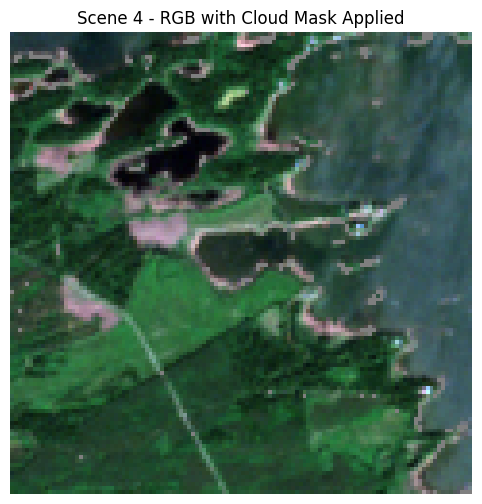

✅ Scene 4 masked RGB saved


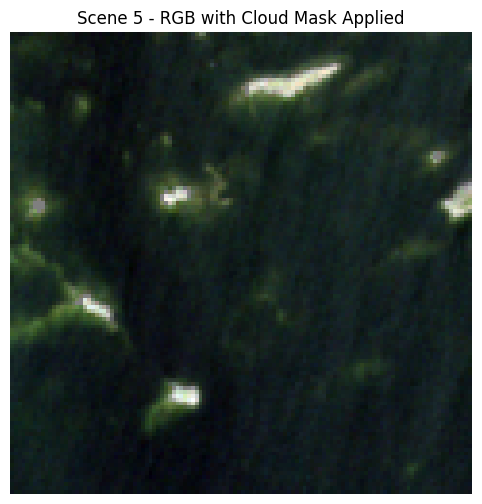

✅ Scene 5 masked RGB saved


In [30]:
for i in range(1, len(scenes)):  # Scenes 2 to 5
    scene = scenes[i]

    # Normalize RGB and cloud bands
    red = normalize(scene[3])
    green = normalize(scene[2])
    blue = normalize(scene[1])
    nir = normalize(scene[7])
    swir1 = normalize(scene[11])

    rgb = np.dstack((red, green, blue))

    # Generate cloud mask
    cloud_mask = (
        (blue > 0.25) &
        (green > 0.25) &
        (red > 0.25) &
        (nir > 0.25) &
        (swir1 < 0.3)
    )

    # Apply cloud mask (set clouds to gray)
    masked_rgb = rgb.copy()
    masked_rgb[cloud_mask] = [0.5, 0.5, 0.5]

    # Show and Save
    plt.figure(figsize=(8, 6))
    plt.imshow(masked_rgb)
    plt.title(f'Scene {i+1} - RGB with Cloud Mask Applied')
    plt.axis('off')
    plt.show()

    plt.imsave(f'/content/scene{i+1}_rgb_masked.png', masked_rgb)
    print(f"✅ Scene {i+1} masked RGB saved")


### Mask Clouds from **NDVI** (Scenes 2 to 5)

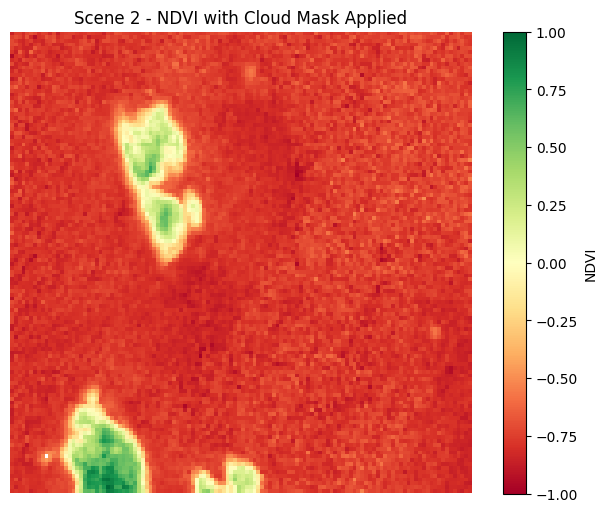

✅ Scene 2 masked NDVI saved


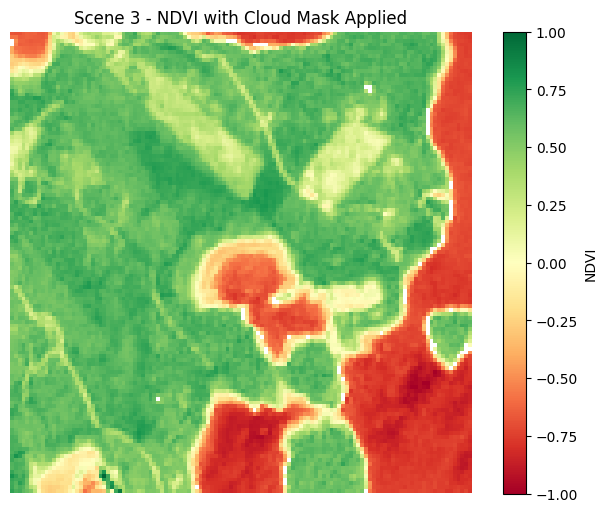

✅ Scene 3 masked NDVI saved


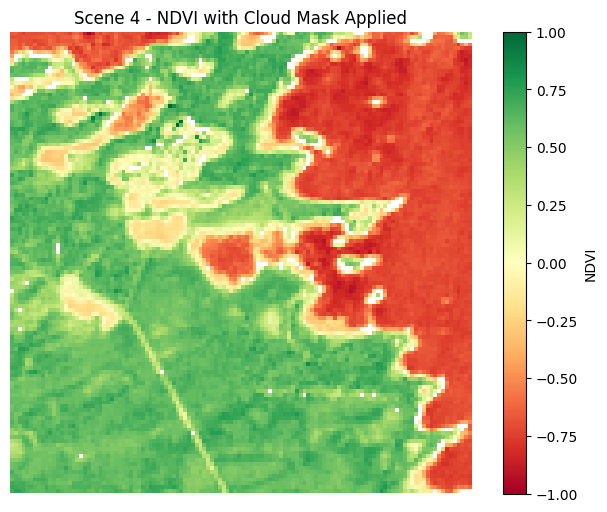

✅ Scene 4 masked NDVI saved


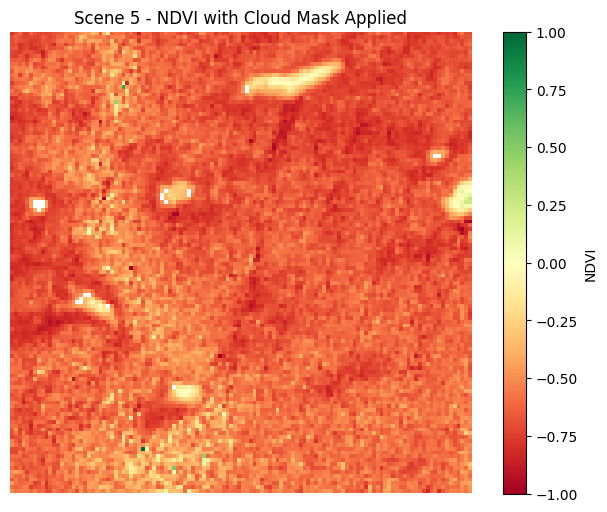

✅ Scene 5 masked NDVI saved


In [31]:
for i in range(1, len(scenes)):  # Scenes 2 to 5
    scene = scenes[i]

    # Normalize red, nir, and other bands
    red = normalize(scene[3])
    nir = normalize(scene[7])
    blue = normalize(scene[1])
    green = normalize(scene[2])
    swir1 = normalize(scene[11])

    # Calculate NDVI
    ndvi = (nir - red) / (nir + red + 1e-10)

    # Generate cloud mask
    cloud_mask = (
        (blue > 0.25) &
        (green > 0.25) &
        (red > 0.25) &
        (nir > 0.25) &
        (swir1 < 0.3)
    )

    # Apply mask (set clouds to NaN)
    ndvi_masked = ndvi.copy()
    ndvi_masked[cloud_mask] = np.nan

    # Show and Save
    plt.figure(figsize=(8, 6))
    plt.imshow(ndvi_masked, cmap='RdYlGn', vmin=-1, vmax=1)
    plt.title(f'Scene {i+1} - NDVI with Cloud Mask Applied')
    plt.colorbar(label='NDVI')
    plt.axis('off')
    plt.show()

    plt.imsave(f'/content/scene{i+1}_ndvi_masked.png', ndvi_masked, cmap='RdYlGn', vmin=-1, vmax=1)
    print(f"✅ Scene {i+1} masked NDVI saved")
